In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import glob

In [2]:
hpc_path = f'results/hpc_benchmark_2_16_1_daint_strict_thread_*.csv'

hpc_split_path = f'results/hpc_benchmark_2_16_1_daint_strict_split_thread_*.csv'

hpc_one_path = f'results/hpc_benchmark_2_16_1_daint_strict_one_thread_*.csv'
hpc_all_path = f'results/hpc_benchmark_2_16_1_daint_strict_all_thread_*.csv'
hpc_in_path = f'results/hpc_benchmark_2_16_1_daint_strict_in_thread_*.csv'
hpc_out_path = f'results/hpc_benchmark_2_16_1_daint_strict_out_thread_*.csv'
hpc_tot_path = f'results/hpc_benchmark_2_16_1_daint_strict_tot_thread_*.csv'
hpc_bern_path = f'results/hpc_benchmark_2_16_1_daint_strict_bern_thread_*.csv'
hpc_bern_sym_path = f'results/hpc_benchmark_2_16_1_daint_strict_bern-sym_thread_*.csv'

mam_path = f'results/multi-area-model_2_16_1_daint_strict_thread_*.csv'

mesocircuit_path = f'results/4x4_mesocircuit_2_16_1_daint_strict_thread_*.csv'

# HPC benchmark

In [3]:
hpc_res = pd.concat([pd.read_csv(bench)
                     for bench in glob.glob(hpc_path)])

In [4]:
print(hpc_res)

   NUMBER_OF_NODES  TASKS_PER_NODE  THREADS_PER_TASK  NUM_VPS  SCALE  PLASTIC  \
0                1               6                 4       24     20     True   
1                2               6                 4       48     40     True   
2                4               6                 4       96     80     True   
3                8               6                 4      192    160     True   
4               16               6                 4      384    320     True   
0                1               2                12       24     20     True   
1                2               2                12       48     40     True   
2                4               2                12       96     80     True   
3                8               2                12      192    160     True   
4               16               2                12      384    320     True   

   T_nrns  T_conns_min  T_conns_max  T_ini_min  T_ini_max  T_equ   T_sim  \
0    0.39        75.88        77

In [5]:
hpc_res['T_bld_xn'] = hpc_res['T_conns_min'] + hpc_res['T_ini_max']
hpc_res['T_bld_nx'] = hpc_res['T_conns_max'] + hpc_res['T_ini_min']

hpc_res['T_bld'] = hpc_res[['T_bld_xn', 'T_bld_nx']].min(axis=1)

In [6]:
hpc_pres = pd.pivot_table(hpc_res, index=['SCALE','THREADS_PER_TASK', 'NUMBER_OF_NODES'],
                      values=['T_bld', 'VSize_sum'])

In [7]:
hpc_pres

T_bld   VSize_sum
SCALE THREADS_PER_TASK NUMBER_OF_NODES                    
20    4                1                142.45   104752416
      12               1                236.48   101868648
40    4                2                152.31   214484464
      12               2                236.64   203051504
80    4                4                157.80   428892040
      12               4                232.77   410024616
160   4                8                158.23   904560024
      12               8                255.49   838053720
320   4                16               168.61   954598104
      12               16               295.82  1882170744

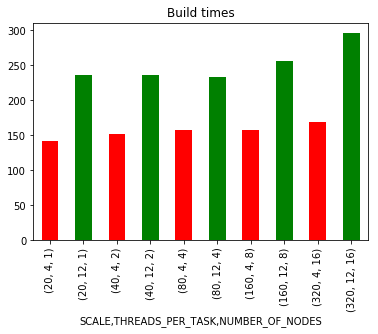

In [8]:
hpc_pres['T_bld'].plot(kind='bar', title='Build times', color = ['r', 'g']*int(len(hpc_pres)/2))

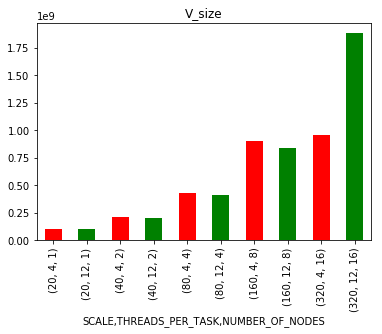

In [9]:
hpc_pres['VSize_sum'].plot(kind='bar', title='V_size', color = ['r', 'g']*int(len(hpc_pres)/2))

# HPC Benchmark - split into many `Connect` calls

In [10]:
hpc_split_res = pd.concat([pd.read_csv(bench)
                           for bench in glob.glob(hpc_split_path)])

In [11]:
print(hpc_split_res)

   NUMBER_OF_NODES  TASKS_PER_NODE  THREADS_PER_TASK  SCALE  PLASTIC  NBLOCKS  \
0                1               6                 4     20     True     1000   
1                2               6                 4     40     True     1000   
2                4               6                 4     80     True     1000   
3                8               6                 4    160     True     1000   
4               16               6                 4    320     True     1000   
0                1               2                12     20     True     1000   
1                2               2                12     40     True     1000   
2                4               2                12     80     True     1000   
3                8               2                12    160     True     1000   
4               16               2                12    320     True     1000   
0                1              24                 1     20     True     1000   
1                2          

In [12]:
hpc_split_res['T_bld'] = hpc_split_res['EE_inner_conn_time'] + hpc_split_res['EI_inner_conn_time'] + hpc_split_res['IE_inner_conn_time'] + hpc_split_res['II_inner_conn_time']

In [13]:
hpc_split_pres = pd.pivot_table(hpc_split_res, index=['SCALE','THREADS_PER_TASK', 'NUMBER_OF_NODES'],
                                values=['T_bld', 'VSize_sum', 'N_conns_sum', 'EE_conns_per_sec'])

In [14]:
hpc_split_pres

EE_conns_per_sec  N_conns_sum  T_bld  \
SCALE THREADS_PER_TASK NUMBER_OF_NODES                                         
20    1                1                       2169020.0   2520225000   49.0   
      4                1                       4035270.0   2520225000  124.0   
      12               1                       9464830.0   2520225000  224.0   
40    1                2                       2142860.0   5040450000  162.0   
      4                2                       4001190.0   5040450000  168.0   
      12               2                       9119570.0   5040450000  279.0   
80    1                4                       2085910.0   5040450000  151.0   
      4                4                       3950260.0  10080900000  163.0   
      12               4                       9429570.0  10080900000  274.0   
160   1                8                       2017330.0   5040450000  193.0   
      4                8                       3803890.0  20161800000  328.0   
      12               8                       8764340.0  20161800000  188.0   
320   1                16                      1862580.0   5040450000  161.0   
      4                16                      3642250.0  20161800000  220.0   
      12               16                      8392910.0  40323600000   95.0   

                                         VSize_sum  
SCALE THREADS_PER_TASK NUMBER_OF_NODES              
20    1                1                 108664800  
      4                1                 104721696  
      12               1                 110087768  
40    1                2                 254238928  
      4                2                 218385904  
      12               2                 203094512  
80    1                4                 254344720  
      4                4                 432689032  
      12               4                 410079912  
160   1                8                 261339088  
      4                8                 897822104  
      12               8                 832610136  
320   1                16                262001488  
      4                16                956072664  
      12               16               1884220788

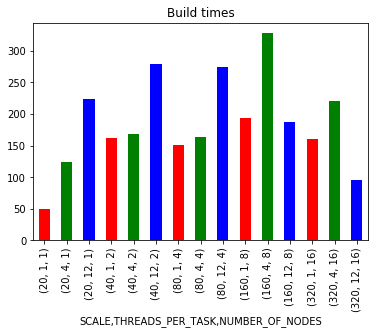

In [15]:
hpc_split_pres['T_bld'].plot(kind='bar', title='Build times', color = ['r', 'g', 'b']*int(len(hpc_split_pres)/3))

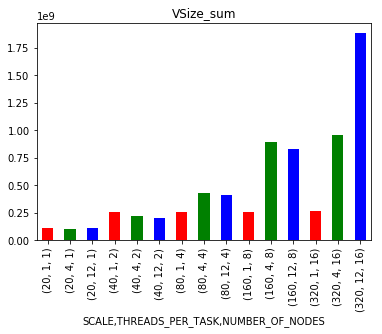

In [16]:
hpc_split_pres['VSize_sum'].plot(kind='bar', title='VSize_sum', color = ['r', 'g', 'b']*int(len(hpc_split_pres)/3))

# HPC Benchmark - only `one_to_one` calls

In [17]:
hpc_one_res = pd.concat([pd.read_csv(bench)
                         for bench in glob.glob(hpc_one_path)])

In [18]:
print(hpc_one_res)

   NUMBER_OF_NODES  TASKS_PER_NODE  THREADS_PER_TASK  SCALE  PLASTIC RULE  \
0                1              24                 1     20     True  one   
1                2              24                 1     40     True  one   
2                4              24                 1     80     True  one   
3                8              24                 1    160     True  one   
4               16              24                 1    320     True  one   
0                1               2                12     20     True  one   
1                2               2                12     40     True  one   
2                4               2                12     80     True  one   
3                8               2                12    160     True  one   
4               16               2                12    320     True  one   
0                1               6                 4     20     True  one   
1                2               6                 4     40     True  one   

In [19]:
hpc_one_res['T_bld'] = hpc_one_res['EE_inner_conn_time'] + hpc_one_res['EI_inner_conn_time'] + hpc_one_res['IE_inner_conn_time'] + hpc_one_res['II_inner_conn_time']

In [20]:
hpc_one_pres = pd.pivot_table(hpc_one_res, index=['SCALE','THREADS_PER_TASK', 'NUMBER_OF_NODES'],
                              values=['T_bld', 'VSize_sum', 'N_conns_sum', 'EE_conns_per_sec'])
hpc_one_pres

EE_conns_per_sec  N_conns_sum  T_bld  \
SCALE THREADS_PER_TASK NUMBER_OF_NODES                                         
20    1                1                             NaN      1080000    0.0   
      4                1                       3000000.0      1080000    3.0   
      12               1                       4500000.0      1080000    7.0   
40    1                2                        750000.0      2160000    4.0   
      4                2                       3000000.0      2160000    2.0   
      12               2                             NaN      2160000    2.0   
80    1                4                             NaN      2160000    3.0   
      4                4                       3000000.0      4320000    1.0   
      12               4                       9000000.0      4320000    4.0   
160   1                8                             NaN      2160000    2.0   
      4                8                       3000000.0      8640000    2.0   
      12               8                       9000000.0      8640000    6.0   
320   1                16                       750000.0      2160000    2.0   
      4                16                            NaN      8640000    2.0   
      12               16                      9000000.0     17280000    3.0   

                                        VSize_sum  
SCALE THREADS_PER_TASK NUMBER_OF_NODES             
20    1                1                 19608212  
      4                1                  4232664  
      12               1                  2479648  
40    1                2                 47605284  
      4                2                  9459540  
      12               2                  5090672  
80    1                4                 55870308  
      4                4                 21156412  
      12               4                 10793848  
160   1                8                 62545188  
      4                8                 51921644  
      12               8                 23347432  
320   1                16                97767588  
      4                16                61098028  
      12               16                55300232

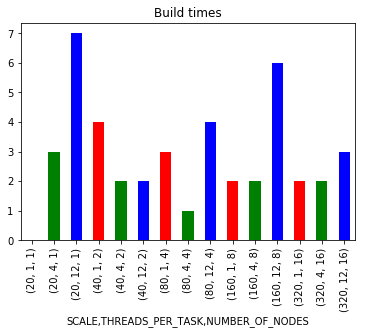

In [21]:
hpc_one_pres['T_bld'].plot(kind='bar', title='Build times', color = ['r', 'g', 'b']*int(len(hpc_split_pres)/3))

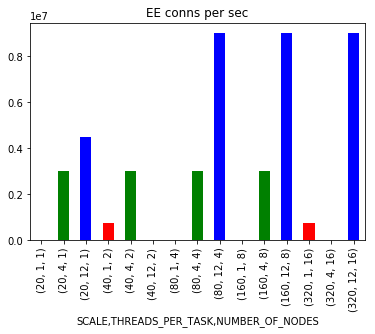

In [22]:
hpc_one_pres['EE_conns_per_sec'].plot(kind='bar', title='EE conns per sec', color = ['r', 'g', 'b']*int(len(hpc_split_pres)/3))

# HBC Benchmark - only `fixed_indegree` calls

In [23]:
hpc_in_res = pd.concat([pd.read_csv(bench)
                        for bench in glob.glob(hpc_in_path)])

In [24]:
print(hpc_in_res)

   NUMBER_OF_NODES  TASKS_PER_NODE  THREADS_PER_TASK  SCALE  PLASTIC RULE  \
0                1               2                12     20     True   in   
1                2               2                12     40     True   in   
2                4               2                12     80     True   in   
3                8               2                12    160     True   in   
4               16               2                12    320     True   in   
0                1              24                 1     20     True   in   
1                2              24                 1     40     True   in   
2                4              24                 1     80     True   in   
3                8              24                 1    160     True   in   
4               16              24                 1    320     True   in   
0                1               6                 4     20     True   in   
1                2               6                 4     40     True   in   

In [25]:
hpc_in_res['T_bld'] = hpc_in_res['EE_inner_conn_time'] + hpc_in_res['EI_inner_conn_time'] + hpc_in_res['IE_inner_conn_time'] + hpc_in_res['II_inner_conn_time']

In [40]:
hpc_in_pres = pd.pivot_table(hpc_in_res, index=['SCALE','THREADS_PER_TASK', 'NUMBER_OF_NODES'],
                             values=['T_bld', 'VSize_sum', 'N_conns_sum', 'EE_conns_per_sec'])
hpc_in_pres

EE_conns_per_sec  N_conns_sum  T_bld  \
SCALE THREADS_PER_TASK NUMBER_OF_NODES                                         
20    1                1                       2757350.0   2025225000  240.0   
      4                1                       5359270.0   2025225000  124.0   
      12               1                      12243000.0   2025225000  145.0   
40    1                2                       2759610.0   4050450000  207.0   
      4                2                       5144820.0   4050450000   47.0   
      12               2                      11275100.0   4050450000  243.0   
80    1                4                       2768660.0   4050450000  238.0   
      4                4                       5022320.0   8100900000  224.0   
      12               4                      11873400.0   8100900000  106.0   
160   1                8                       2755100.0   4050450000  246.0   
      4                8                       5131130.0  16201800000  184.0   
      12               8                      11617900.0  16201800000  212.0   
320   1                16                      2768660.0   4050450000  218.0   
      4                16                      5079010.0  16201800000  179.0   
      12               16                     11821400.0  32403600000  238.0   

                                         VSize_sum  
SCALE THREADS_PER_TASK NUMBER_OF_NODES              
20    1                1                  92936160  
      4                1                  84084000  
      12               1                  82918504  
40    1                2                 185032912  
      4                2                 168306160  
      12               2                 165949936  
80    1                4                 191921680  
      4                4                 338540424  
      12               4                 332513960  
160   1                8                 192133072  
      4                8                 717800856  
      12               8                 663566164  
320   1                16                224252752  
      4                16                682558168  
      12               16               1331105136

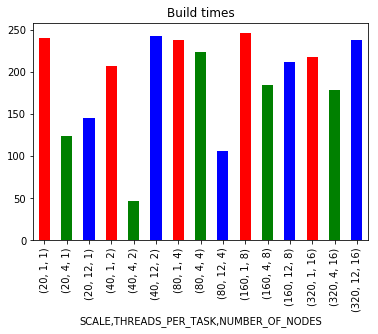

In [27]:
hpc_in_pres['T_bld'].plot(kind='bar', title='Build times', color = ['r', 'g', 'b']*int(len(hpc_split_pres)/3))

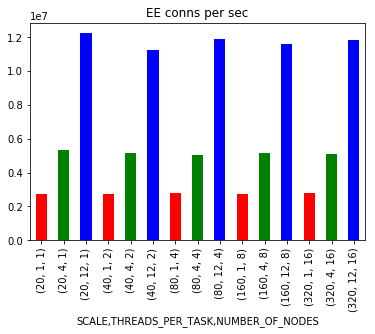

In [28]:
hpc_in_pres['EE_conns_per_sec'].plot(kind='bar', title='EE conns per sec', color = ['r', 'g', 'b']*int(len(hpc_split_pres)/3))

In [45]:
hpc_one_in_res = pd.concat([hpc_one_res, hpc_in_res])
hpc_one_in_pres = pd.pivot_table(hpc_one_in_res, index=['RULE','SCALE','THREADS_PER_TASK', 'NUMBER_OF_NODES'],
                                 values=['EE_conns_per_sec'])
hpc_one_in_pres

EE_conns_per_sec
RULE SCALE THREADS_PER_TASK NUMBER_OF_NODES                  
in   20    1                1                       2757350.0
           4                1                       5359270.0
           12               1                      12243000.0
     40    1                2                       2759610.0
           4                2                       5144820.0
           12               2                      11275100.0
     80    1                4                       2768660.0
           4                4                       5022320.0
           12               4                      11873400.0
     160   1                8                       2755100.0
           4                8                       5131130.0
           12               8                      11617900.0
     320   1                16                      2768660.0
           4                16                      5079010.0
           12               16                     11821400.0
one  20    1                1                             NaN
           4                1                       3000000.0
           12               1                       4500000.0
     40    1                2                        750000.0
           4                2                       3000000.0
           12               2                             NaN
     80    1                4                             NaN
           4                4                       3000000.0
           12               4                       9000000.0
     160   1                8                             NaN
           4                8                       3000000.0
           12               8                       9000000.0
     320   1                16                       750000.0
           4                16                            NaN
           12               16                      9000000.0

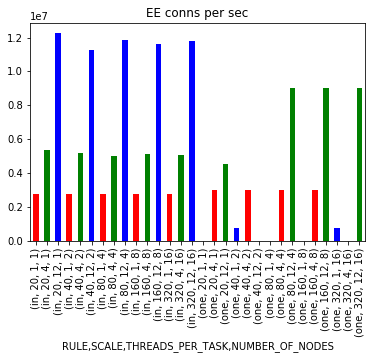

In [43]:
hpc_one_in_pres['EE_conns_per_sec'].plot(kind='bar', title='EE conns per sec', color = ['r', 'g', 'b']*int(len(hpc_split_pres)/3))

# Multi-Area-Model

In [29]:
mam_res = pd.concat([pd.read_csv(bench)
                     for bench in glob.glob(mam_path)])

In [30]:
print(mam_res)

   NUMBER_OF_NODES  TASKS_PER_NODE  NUM_VPS  THREADS_PER_TASK   SCALE  \
0                1               6       24                 4  0.0625   
1                2               6       48                 4  0.1250   
2                4               6       96                 4  0.2500   
3                8               6      192                 4  0.5000   
4               16               6      384                 4  1.0000   

   T_network_local  T_network_global_avg  T_create_avg  T_connect_avg  T_sim  \
0              NaN                   NaN           NaN            NaN    NaN   
1              NaN                   NaN           NaN            NaN    NaN   
2              NaN                   NaN           NaN            NaN    NaN   
3              NaN                   NaN           NaN            NaN    NaN   
4              NaN                   NaN           NaN            NaN    NaN   

   VSize_sum  N_nrns  N_conns_sum  
0        NaN     NaN          NaN  
1       

In [31]:
mam_pres = pd.pivot_table(mam_res, index=['SCALE','THREADS_PER_TASK', 'NUMBER_OF_NODES'],
                          values=['T_connect_avg', 'VSize_sum', 'N_conns_sum'])

In [32]:
mam_pres

,,
SCALE,THREADS_PER_TASK,NUMBER_OF_NODES
0.0625,4,1
0.1250,4,2
0.2500,4,4
0.5000,4,8
1.0000,4,16


In [33]:
mam_pres['T_connect_avg'].plot(kind='bar', title='Build times', color = ['r', 'g', 'b']*int(len(hpc_split_pres)/3))

KeyError: 'T_connect_avg'

# 4x4 mesocircuit

In [34]:
meso_res = pd.concat([pd.read_csv(bench)
                      for bench in glob.glob(mesocircuit_path)])

In [35]:
print(meso_res)

   NUMBER_OF_NODES  TASKS_PER_NODE  THREADS_PER_TASK   SCALE  \
0                1              24                 1  0.0625   
1                2              24                 1  0.1250   
2                4              24                 1  0.2500   
3                8              24                 1  0.5000   
4               16              24                 1  1.0000   
0                1               2                12  0.0625   
1                2               2                12  0.1250   
2                4               2                12  0.2500   
3                8               2                12  0.5000   
4               16               2                12  1.0000   
0                1               6                 4  0.0625   
1                2               6                 4  0.1250   
2                4               6                 4  0.2500   
3                8               6                 4  0.5000   
4               16               6      

In [36]:
meso_pres = pd.pivot_table(meso_res, index=['SCALE','THREADS_PER_TASK', 'NUMBER_OF_NODES'],
                           values=['T_conns_avg', 'VSize_sum', 'N_conns_sum'])

In [37]:
meso_pres

N_conns_sum  T_conns_avg  VSize_sum
SCALE  THREADS_PER_TASK NUMBER_OF_NODES                                     
0.0625 1                1                  345513663   147.686667   40128480
       4                1                  345513663   222.121667   23614752
       12               1                  345513663   275.895000   21403204
0.1250 1                2                  690961118   156.176042   70312296
       4                2                  690961118   235.279167   49554928
       12               2                  690961118   273.705000   43437476
0.2500 1                4                 1382076915   192.519063  156659176
       4                4                 1382076915   316.797083  105088904
       12               4                 1382076915   341.207500   91423736
0.5000 1                8                 2764017366   279.417812  314313496
       4                8                 2764017366   453.051458  199482776
       12               8                 2764017366   482.738125  186905064
1.0000 1                16                5527838034   457.390573  710875768
       4                16                5527838034   691.948125  450616824
       12               16                5527838034   765.175938  410852724

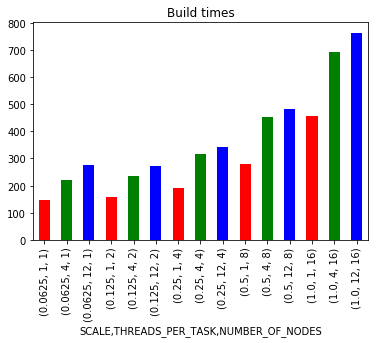

In [38]:
meso_pres['T_conns_avg'].plot(kind='bar', title='Build times', color = ['r', 'g', 'b']*int(len(hpc_split_pres)/3))

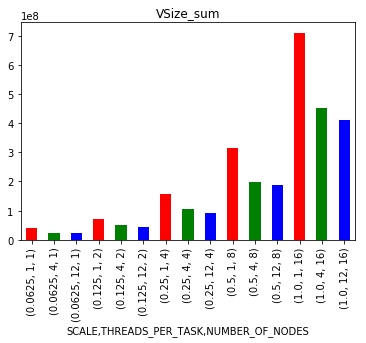

In [39]:
meso_pres['VSize_sum'].plot(kind='bar', title='VSize_sum', color = ['r', 'g', 'b']*int(len(hpc_split_pres)/3))